# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:

* year: 2016 para todos los puntos de datos
* month: número para el mes del año
* day: número del día del año
* week: día de la semana como cadena de carácteres
* temp_2: temperatura máxima 2 días antes
* temp_1: temperatura máxima 1 día antes
* average: temperatura máxima media histórica
* actual: temperatura máxima medida
* friend: la predicción de su amigo, un número aleatorio entre 20 por debajo de la media y 20 por encima de la media

### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [3]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [4]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['week_new_1'] = le.fit_transform(df['week'])
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_new_1
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5


In [6]:
my_week = {'Mon':0, 'Tues':1, "Wed":2, "Thurs":3, "Fri":4, "Sat":5, "Sun":6}

df['week_new_2'] = df['week'].replace(my_week)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_new_1,week_new_2
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,4
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,5
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,6
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,1


In [7]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


<AxesSubplot:>

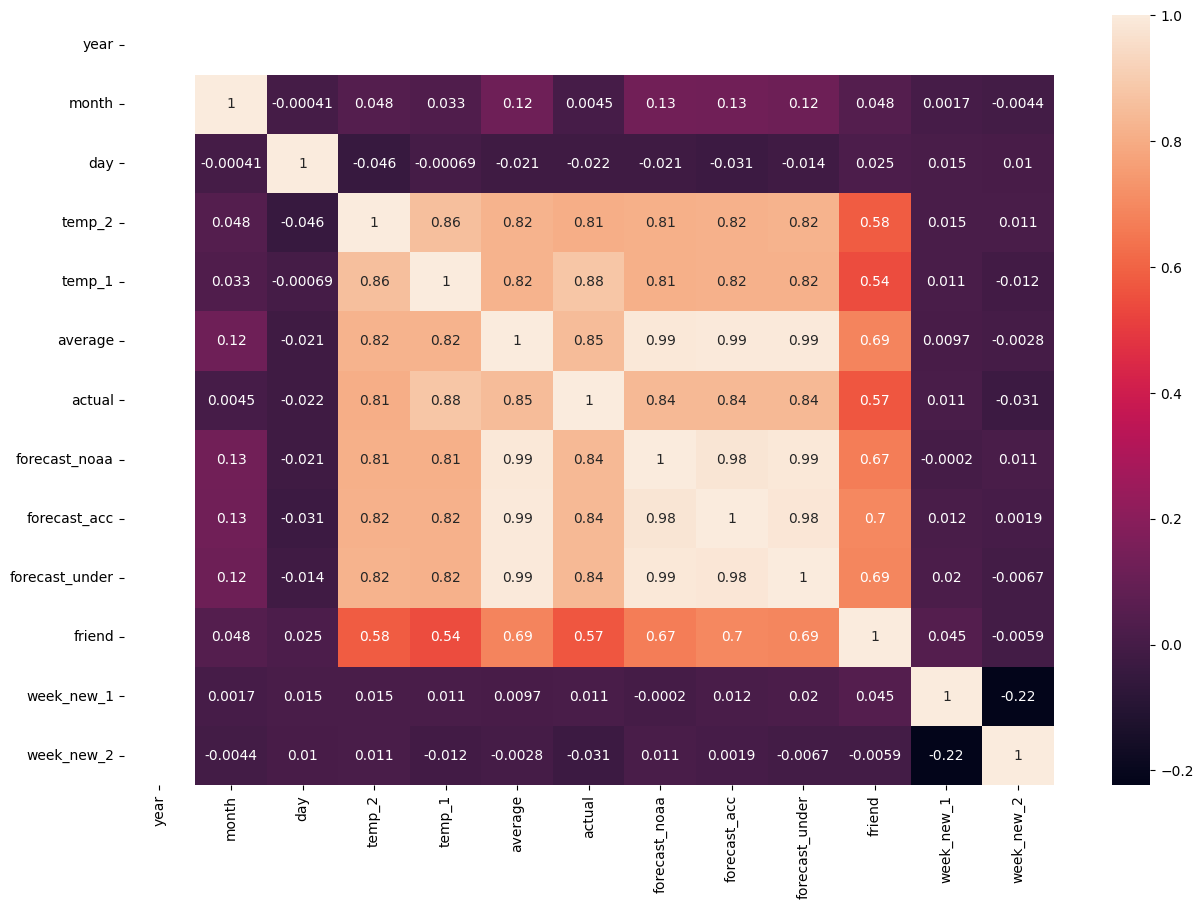

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

### 3. Divide en train y test

In [9]:
from sklearn.model_selection import train_test_split

X = df[['temp_1','average','forecast_noaa','friend']]
y = df['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 4)
(70, 4)
(278,)
(70,)


### 4. Entrena el modelo


In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [12]:
y_pred = dtr.predict(X_test)
y_pred

array([64., 60., 51., 66., 57., 77., 79., 76., 71., 75., 68., 67., 39.,
       60., 78., 57., 63., 49., 52., 67., 57., 56., 71., 55., 64., 49.,
       66., 45., 59., 77., 60., 66., 56., 90., 73., 60., 57., 57., 67.,
       40., 60., 49., 89., 43., 58., 76., 51., 79., 51., 40., 45., 41.,
       64., 64., 81., 57., 55., 63., 51., 59., 70., 52., 60., 71., 71.,
       57., 71., 67., 80., 41.])

In [46]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6354634938056818
MAE 5.542857142857143
MAPE 0.0877759277442539
MSE 50.97142857142857
RMSE 7.13942774817622


In [47]:
y_pred_train = dtr.predict(X_train)

In [48]:
print('Coeficiente determinación', r2_score(y_train, y_pred_train))
print('MAE', mean_absolute_error(y_train, y_pred_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_pred_train))
print('MSE', mean_squared_error(y_train, y_pred_train))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

In [49]:
X_train.dtypes

temp_1             int64
average          float64
forecast_noaa      int64
friend             int64
dtype: object

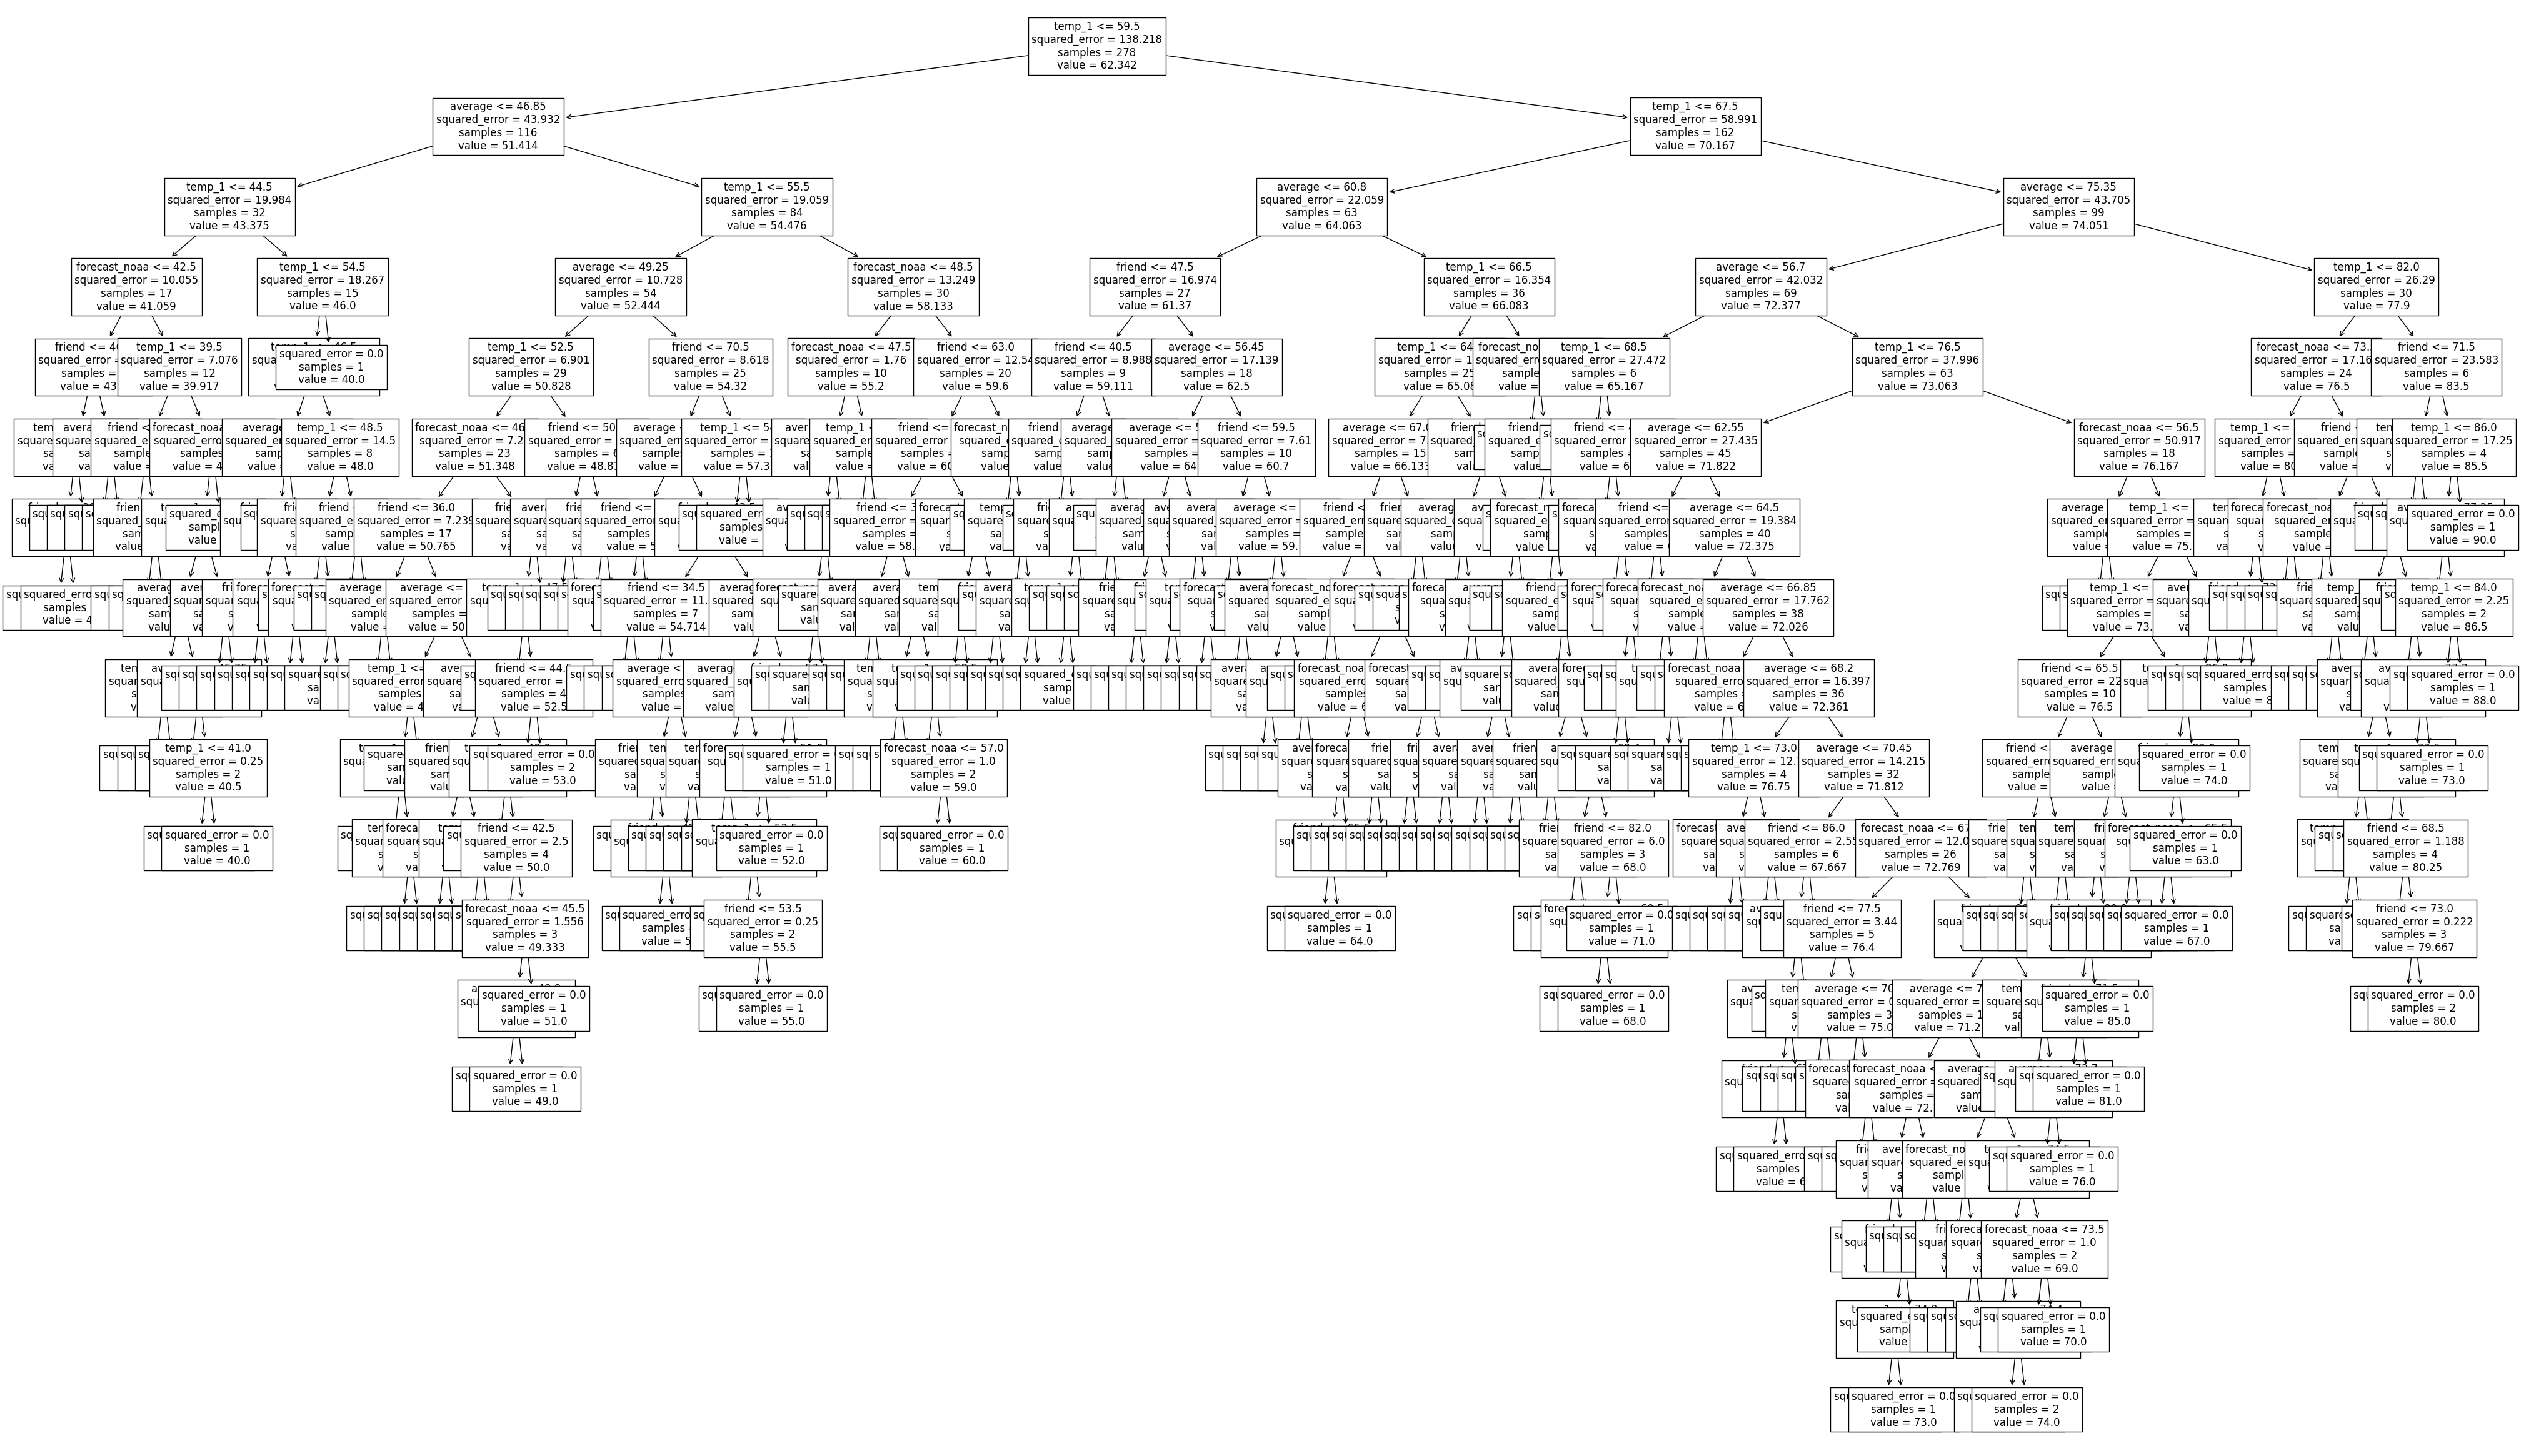

In [50]:
plt.figure(figsize=(50,30))

plot_tree(dtr, feature_names=X_train.columns, fontsize=12);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [51]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [52]:
y_pred = dtr_3.predict(X_test)
y_pred

array([72.37681159, 61.37037037, 52.44444444, 66.08333333, 66.08333333,
       72.37681159, 77.9       , 77.9       , 61.37037037, 72.37681159,
       61.37037037, 72.37681159, 41.05882353, 61.37037037, 72.37681159,
       58.13333333, 61.37037037, 52.44444444, 58.13333333, 72.37681159,
       66.08333333, 58.13333333, 66.08333333, 61.37037037, 58.13333333,
       52.44444444, 66.08333333, 46.        , 58.13333333, 77.9       ,
       72.37681159, 66.08333333, 58.13333333, 77.9       , 77.9       ,
       61.37037037, 52.44444444, 52.44444444, 72.37681159, 46.        ,
       72.37681159, 52.44444444, 72.37681159, 41.05882353, 61.37037037,
       72.37681159, 52.44444444, 77.9       , 52.44444444, 41.05882353,
       46.        , 41.05882353, 66.08333333, 66.08333333, 72.37681159,
       61.37037037, 58.13333333, 58.13333333, 52.44444444, 58.13333333,
       66.08333333, 52.44444444, 61.37037037, 72.37681159, 61.37037037,
       58.13333333, 72.37681159, 72.37681159, 77.9       , 41.05

In [53]:
temp = pd.DataFrame(y_pred)
temp[0].unique()
#print(df["Subjects"].unique())

array([72.37681159, 61.37037037, 52.44444444, 66.08333333, 77.9       ,
       41.05882353, 58.13333333, 46.        ])

In [54]:
print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7786776796296856
MAE 4.267242249556827
MAPE 0.0674392768128964
MSE 30.946461197509944
RMSE 5.5629543587476915


In [55]:
y_pred_train = dtr_3.predict(X_train)

In [56]:
print('Coeficiente determinación', r2_score(y_train, y_pred_train))
print('MAE', mean_absolute_error(y_train, y_pred_train))
print('MAPE', mean_absolute_percentage_error(y_train, y_pred_train))
print('MSE', mean_squared_error(y_train, y_pred_train))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coeficiente determinación 0.8397458755018086
MAE 3.675752083754991
MAPE 0.05874668452706153
MSE 22.14996536445183
RMSE 4.706374970659672


### 9. Vuelve a representar su árbol

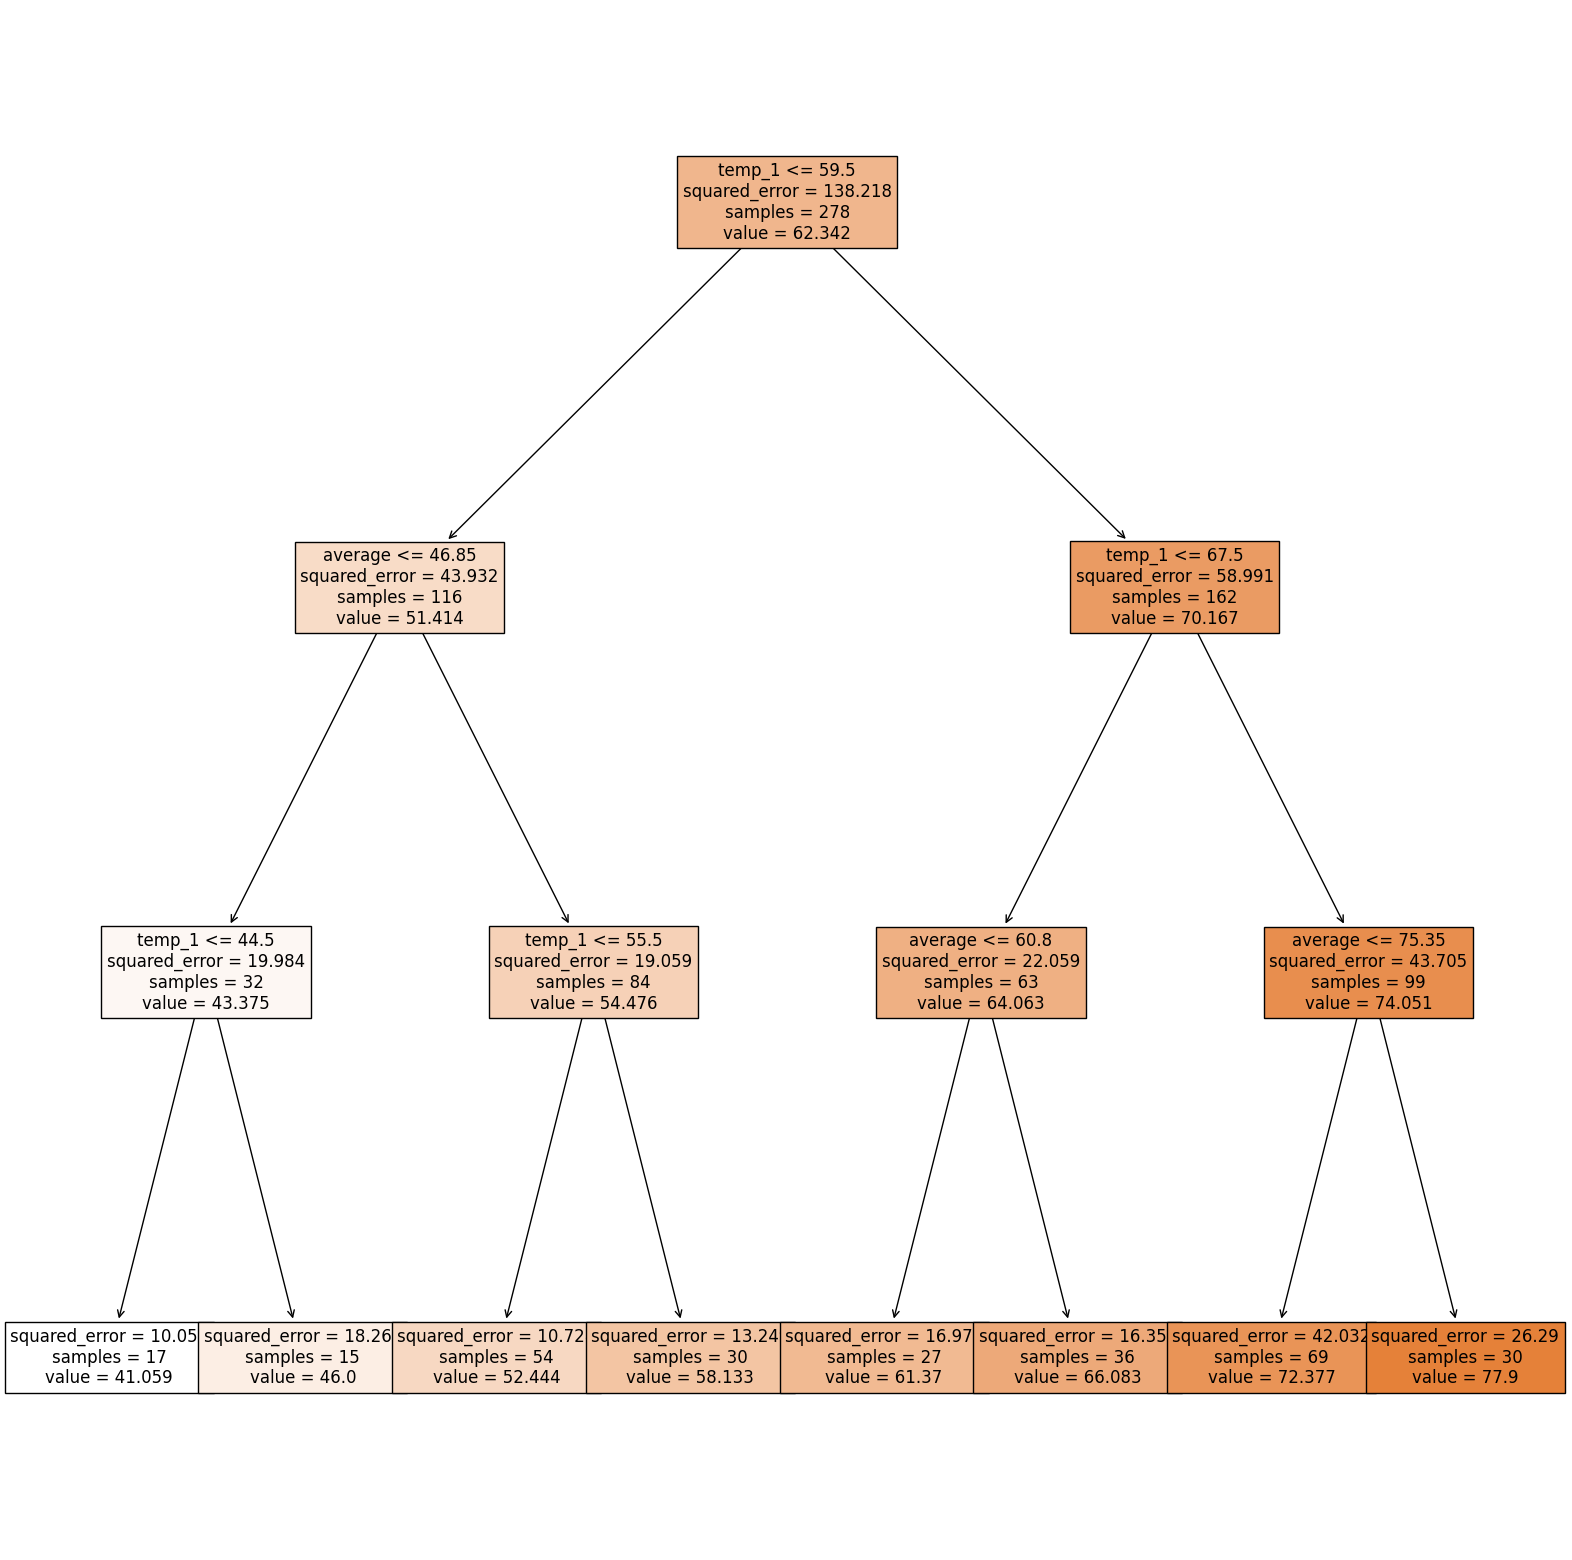

In [57]:
plt.figure(figsize=(20,20))

plot_tree(dtr_3, feature_names=X_train.columns, class_names='actual', fontsize=12, filled=True);

### 10. Utiliza un grid search con cross validation.

In [58]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

parameters = {'max_depth' : [2,3,4,5],
              'criterion' : ['squared_error', 'absolute_error'],
              'min_samples_split' : [2,5,10,15],
              'min_samples_leaf': [2,4,6,8,10],
              'max_features': [1,2,3,4]
            }

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error')

dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [59]:
dtr_gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 2,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [60]:
dtr_gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=2, min_samples_leaf=8)

In [61]:
dtr_gs.best_score_

-3.8843775003264596

In [62]:
dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_absolute_error')

dtr_gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='neg_mean_absolute_error')

In [63]:
dtr_gs.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 15}

In [64]:
dtr_gs.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=5, max_features=3,
                      min_samples_leaf=2, min_samples_split=15)

In [65]:
dtr_gs.best_estimator_.predict([[1,2,3,4]])

c:\Users\Fernando Carrasco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([37.])

In [66]:
dtr_gs.best_score_

-4.1513664596273285

In [67]:
# 1º Modelo
modelo_1 = DecisionTreeRegressor(max_depth=4, max_features=3, min_samples_leaf=8)
modelo_1.fit(X_train, y_train)

# 2º Modelo
modelo_2 = DecisionTreeRegressor(max_depth=4, max_features=2, min_samples_leaf=4)
modelo_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=2, min_samples_leaf=4)

In [68]:
y_pred = modelo_1.predict(X_test)
print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7989567439266395
MAE 4.0175956303897475
MAPE 0.0638528839612293
MSE 28.110934824311535
RMSE 5.301974615585361


In [69]:
y_pred = modelo_2.predict(X_test)
print('Coeficiente determinación', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.8021313837146086
MAE 4.157607838676162
MAPE 0.0663673291960773
MSE 27.667039844130255
RMSE 5.259946752974811


In [70]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(modelo_1, X, y, cv=10, scoring = 'neg_mean_absolute_error')

results

array([-3.32996778, -3.53102041, -5.40979234, -6.7973644 , -4.85087578,
       -3.71465485, -4.30004186, -3.59673617, -3.80668358, -4.83361345])

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [40]:
modelo_1.feature_importances_

array([0.873519  , 0.10809138, 0.01421393, 0.00417569])

In [41]:
X_train.columns

Index(['temp_1', 'average', 'forecast_noaa', 'friend'], dtype='object')

In [42]:
pd.DataFrame({'features':X_train.columns, 'importances':modelo_1.feature_importances_}).sort_values(by='importances', ascending=False)

,features,importances
0,temp_1,0.873519
1,average,0.108091
2,forecast_noaa,0.014214
3,friend,0.004176


### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [43]:
df['target_class'] = np.where(df['actual']>59, 1, 0)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_new_1,week_new_2,target_class
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,0,4,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2,5,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,3,6,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,5,1,0


<AxesSubplot:>

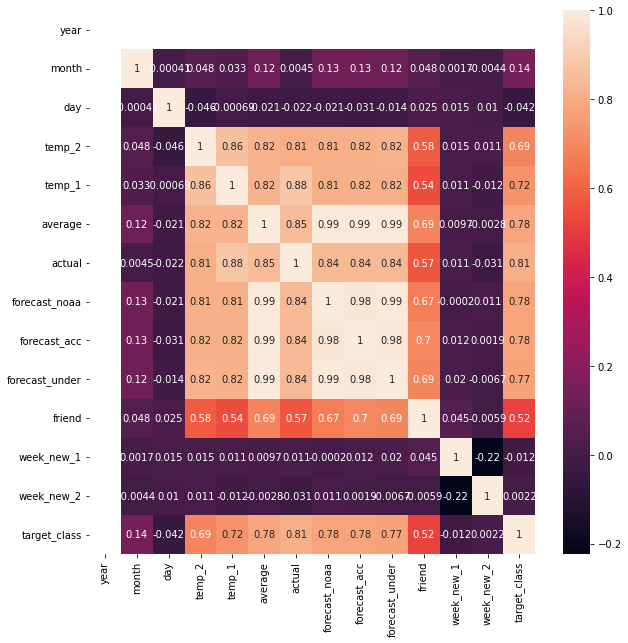

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [47]:
df['target_class'].value_counts(normalize=True)

1    0.586207
0    0.413793
Name: target_class, dtype: float64

In [48]:
X = df[['temp_1','average','forecast_noaa','friend']]
y = df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9142857142857143
Precision 0.9285714285714286
Recall 0.9285714285714286
ROC 0.9107142857142858


In [53]:
parameters = {'max_depth' : [2,3,4,5],
              'criterion' : ['gini', 'entropy'],
              'min_samples_split' : [2,5,10,15],
              'min_samples_leaf': [2,4,6,8,10],
              'max_features': [1,2,3,4]
            }

model = DecisionTreeClassifier()

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring='accuracy')

dtr_gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [54]:
dtr_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=1,
                       min_samples_leaf=4, min_samples_split=5)

In [55]:
dtr = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=1,
                       min_samples_leaf=4, min_samples_split=5)
dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9142857142857143
Precision 0.8913043478260869
Recall 0.9761904761904762
ROC 0.8988095238095237


In [56]:
results = cross_val_score(dtr, X, y, cv=10, scoring = 'accuracy')

results.mean()

0.8311764705882354

In [57]:
results

array([0.8       , 0.85714286, 1.        , 0.8       , 0.6       ,
       0.62857143, 0.74285714, 0.97142857, 0.97058824, 0.94117647])

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('ROC', roc_auc_score(y_test, y_pred))

Accuracy 0.9285714285714286
Precision 0.9111111111111111
Recall 0.9761904761904762
ROC 0.9166666666666667


In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[24,  4],
       [ 1, 41]], dtype=int64)

<AxesSubplot:>

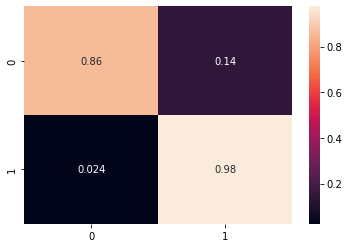

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)